In [24]:
#import train data and test data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [25]:
test.columns

Index(['director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'movie_title',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio', 'profit', 'gross_bin', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'film-noir', 'history', 'horror', 'music',
       'musical', 'mystery', 'romance', 'sci_fi', 'sport', 'thriller', 'war',
       'western', 'director_high', 'director_low', 'actor_1_high',
       'actor_1_low', 'actor_2_high', 'actor_2_low', 'actor_3_high',
       'actor_3_low', 'is_english', 'profit_binary'],
      dtype='object')

In [26]:
logit_model = sm.logit(formula = 'profit_binary~duration+director_facebook_likes+actor_3_facebook_likes+actor_1_facebook_likes+cast_total_facebook_likes+facenumber_in_poster+actor_2_facebook_likes+aspect_ratio+aspect_ratio', data = train).fit() #Developing logistic regression model
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.678818
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2996
Method:                           MLE   Df Model:                            8
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                 0.01711
Time:                        13:43:29   Log-Likelihood:                -2039.8
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                 3.094e-12
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.4152      0.318      4.450      0.000       0.792       2.038
duration                     -0.0012      0.002     -0.710      0.477      -0.005       0.002
director_facebook_likes    3.991e-05   1.36e-05      2.924      0.003    1.32e-05    6.67e-05
actor_3_facebook_likes       -0.0003   6.46e-05     -4.176      0.000      -0.000      -0.000
actor_1_facebook_likes       -0.0002   4.45e-05     -5.073      0.000      -0.000      -0.000
cast_total_facebook_likes     0.0002   4.43e-05      5.063      0.000       0.000       0.000
facenumber_in_poster         -0.0017      0.018     -0.097      0.923      -0.036       0.033
actor_2_facebook_likes       -0.0002   4.66e-05     -4.577      0.000      -0.000      -0.000
aspect_ratio                 -0.6424      0.140     -4.588      0.000      -0.917      -0.368
=============================================================================================
"""

In [27]:
y_pred = logit_model.predict(test)

# convert predicted probabilities to class labels (0 or 1)
y_pred_class = np.where(y_pred > 0.5, 1, 0)

# compare predicted class labels with actual class labels in the test set
accuracy = np.mean(y_pred_class == test['profit_binary'])
print('Accuracy:', accuracy)


Accuracy: 0.550531914893617


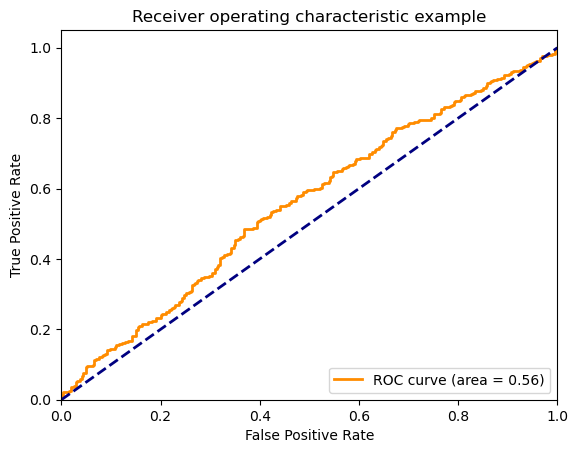

In [34]:
#plot ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test['profit_binary'], y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [30]:
#Function to compute confusion matrix and prediction accuracy on test data
def confusion_matrix_test(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

In [31]:
#Function to compute confusion matrix and prediction accuracy on test/train data
from sklearn.metrics import auc


def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))


Classification accuracy = 55.1%
Precision = 57.2%
TPR or Recall = 67.1%
FNR = 32.9%
FPR = 59.1%
ROC-AUC = 55.8%


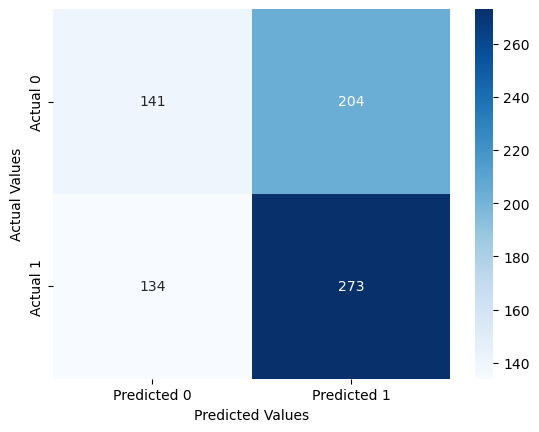

In [32]:
confusion_matrix_data(test,test.profit_binary,logit_model,0.5)

In [33]:
np.exp(-0.666)


0.5137595112299983